In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('Market_Basket_Optimisation.csv',header=None)
df.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
(df.isna().sum() / len(df)) * 100

0      0.000000
1     23.383549
2     41.487802
3     55.405946
4     66.284495
5     75.149980
6     81.749100
7     86.921744
8     91.281163
9     94.734035
10    96.587122
11    97.946940
12    98.840155
13    99.373417
14    99.666711
15    99.893348
16    99.946674
17    99.946674
18    99.960005
19    99.986668
dtype: float64

<Axes: >

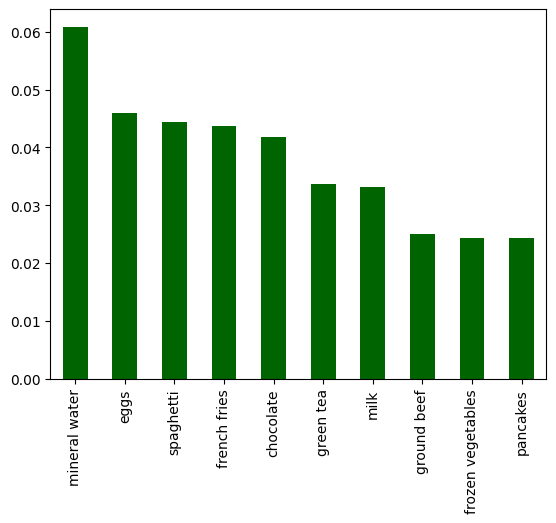

In [11]:
df.stack().value_counts(normalize=True)[:10].plot(kind='bar',color='darkgreen')

In [12]:
df.stack().value_counts()

mineral water    1788
eggs             1348
spaghetti        1306
french fries     1282
chocolate        1230
                 ... 
bramble            14
cream               7
napkins             5
water spray         3
 asparagus          1
Name: count, Length: 120, dtype: int64

In [ ]:
df.iloc[1].dropna().to_list()

: 

In [16]:
## Using loop
transactions = []
for i in range(df.shape[0]):
    row = df.iloc[i].dropna().to_list()
    transactions.append(row)


In [17]:
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

#### Building the model

In [21]:
4*7/len(df)

0.0037328356219170776

In [22]:
## Creating the rule
from apyori import apriori
rules = apriori(transactions=transactions,min_support=0.004,min_confidence=0.2,min_lift=3,min_length=0,
                max_length=2)
results = list(rules)

In [23]:
results

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), 

In [25]:
tuple(results[0][0])

('chicken', 'light cream')

In [26]:
results[0][1]

0.004532728969470737

In [28]:
results[0][2]

[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]

In [29]:
def extract(results):
    item_set  = []
    Supports = []
    antecedent = []
    consquent = []
    lift = []
    confidence = []
    for result in results:
        for subset in result[2]:
            item_set.append(tuple(result[0]))
            Supports.append(result[1])
            antecedent.append(subset[0])
            consquent.append(subset[1])
            confidence.append(subset[2])
            lift.append(subset[3])
    return list(zip(item_set,Supports,antecedent,consquent,lift,confidence))

In [30]:
## Creating a data frame
rules_df = pd.DataFrame(extract(results),columns=['Itemset','Support','antecedent','Consquent','Confidence','Lift'])
rules_df

,Itemset,Support,antecedent,Consquent,Confidence,Lift
0,"(chicken, light cream)",0.004533,(light cream),(chicken),4.843951,0.290598
1,"(escalope, mushroom cream sauce)",0.005733,(mushroom cream sauce),(escalope),3.790833,0.300699
2,"(escalope, pasta)",0.005866,(pasta),(escalope),4.700812,0.372881
3,"(ground beef, herb & pepper)",0.015998,(herb & pepper),(ground beef),3.291994,0.323450
4,"(ground beef, tomato sauce)",0.005333,(tomato sauce),(ground beef),3.840659,0.377358
5,"(olive oil, whole wheat pasta)",0.007999,(whole wheat pasta),(olive oil),4.122410,0.271493
6,"(shrimp, pasta)",0.005066,(pasta),(shrimp),4.506672,0.322034
